In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
% matplitlib inline

ERROR: Line magic function `%matplitlib` not found.


In [2]:
data = pd.read_csv('weibo_data.csv', header=0)

In [3]:
data.columns

Index([u'id', u'posts_num', u'followers_num', u'followings_num', u'vip_num',
       u'gender', u'default_name_cat', u'garbled_name_cat', u'en_name_cat',
       u'ch_name_cat', u'followers_cat', u'device_cat', u'verified_cat',
       u'vip_cat', u'default_cont_cat', u'intro_cat', u'Effective'],
      dtype='object')

In [4]:
data.dtypes

id                    int64
posts_num           float64
followers_num       float64
followings_num      float64
vip_num             float64
gender                int64
default_name_cat    float64
garbled_name_cat    float64
en_name_cat         float64
ch_name_cat         float64
followers_cat       float64
device_cat          float64
verified_cat          int64
vip_cat             float64
default_cont_cat    float64
intro_cat           float64
Effective             int64
dtype: object

In [5]:
data.head()

,id,posts_num,followers_num,followings_num,vip_num,gender,default_name_cat,garbled_name_cat,en_name_cat,ch_name_cat,followers_cat,device_cat,verified_cat,vip_cat,default_cont_cat,intro_cat,Effective
0,5491694217,12152.0,248.0,368.0,2.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,0.0,1.0,1
1,6376654965,4072.0,126.0,389.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,1
2,3034237633,11750.0,277.0,148.0,1.0,1,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,1.0,1.0,1
3,4309507700553383,1824.0,12.0,204.0,3.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,0.0,0.0,1
4,6730618127,61.0,1.0,5.0,0.0,0,1.0,1.0,0.0,0.0,1.0,1.0,0,0.0,1.0,0.0,0


In [6]:
data.isnull().any()

id                  False
posts_num           False
followers_num       False
followings_num      False
vip_num              True
gender              False
default_name_cat    False
garbled_name_cat    False
en_name_cat         False
ch_name_cat         False
followers_cat       False
device_cat          False
verified_cat        False
vip_cat             False
default_cont_cat    False
intro_cat           False
Effective           False
dtype: bool

In [7]:
data['vip_num'].isnull().sum()

14

In [8]:
len(data)

19931

In [9]:
data = data.dropna(subset=['vip_num'])

## plots

In [10]:
# gender
gender_data = data[['gender']].copy()
gender_count = gender_data.groupby(['gender']).size().reset_index(name='counts')
gender_count = gender_count.sort_values(by=['counts'], ascending=False)
gender_data = gender_data.replace([0], 'Male')
gender_data = gender_data.replace([1], 'Female')

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


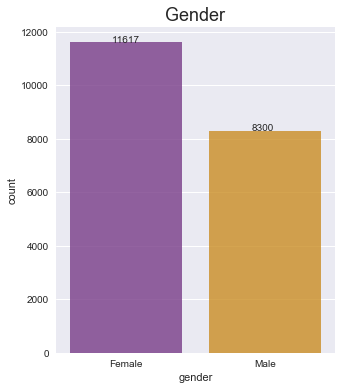

In [11]:
fig, ax = plt.subplots(figsize=(5, 6))
ax = sns.countplot(gender_data['gender'], alpha=0.8, palette='CMRmap')
plt.title('Gender', fontsize=18)
for p, label in zip(ax.patches, gender_count['counts']):
    ax.annotate(label, (p.get_x()+0.3, p.get_height()+5))
plt.show()

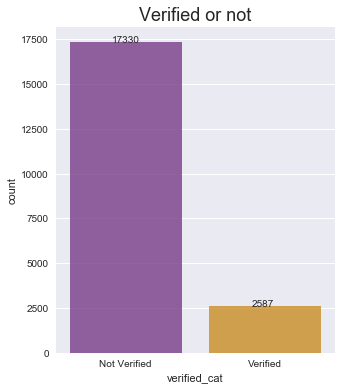

In [12]:
# verified
verified_data = data[['verified_cat']].copy()
verified_count = verified_data.groupby(['verified_cat']).size().reset_index(name='counts')
verified_data = verified_data.replace([0], 'Not Verified')
verified_data = verified_data.replace([1], 'Verified')

fig, ax = plt.subplots(figsize=(5, 6))
ax = sns.countplot(verified_data['verified_cat'], alpha=0.8, palette='CMRmap')
plt.title('Verified or not', fontsize=18)
for p, label in zip(ax.patches, verified_count['counts']):
    ax.annotate(label, (p.get_x()+0.3, p.get_height()+5))
plt.show()

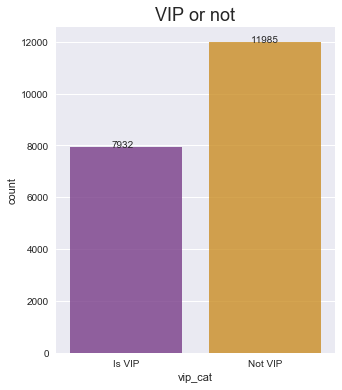

In [13]:
# vip or not
vip_data = data[['vip_cat']].copy()
vip_count = vip_data.groupby(['vip_cat']).size().reset_index(name='counts')
vip_count = vip_count.sort_values(by=['counts'])
vip_data = vip_data.replace([0], 'Not VIP')
vip_data = vip_data.replace([1], 'Is VIP')

fig, ax = plt.subplots(figsize=(5, 6))
ax = sns.countplot(vip_data['vip_cat'], alpha=0.8, palette='CMRmap')
plt.title('VIP or not', fontsize=18)
for p, label in zip(ax.patches, vip_count['counts']):
    ax.annotate(label, (p.get_x()+0.3, p.get_height()+5))
plt.show()

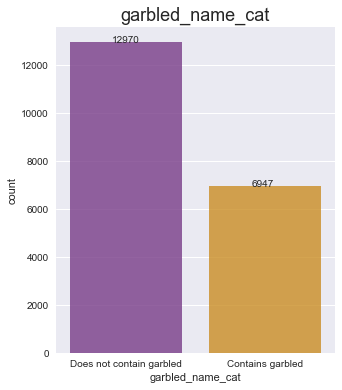

In [14]:
# garbled_name_cat
garbled_data = data[['garbled_name_cat']].copy()
garbled_count = garbled_data.groupby(['garbled_name_cat']).size().reset_index(name='counts')
# garbled_count = garbled_count.sort_values(by=['counts'])
garbled_data = garbled_data.replace([0], 'Does not contain garbled')
garbled_data = garbled_data.replace([1], 'Contains garbled')

fig, ax = plt.subplots(figsize=(5, 6))
ax = sns.countplot(garbled_data['garbled_name_cat'], alpha=0.8, palette='CMRmap')
plt.title('garbled_name_cat', fontsize=18)
for p, label in zip(ax.patches, garbled_count['counts']):
    ax.annotate(label, (p.get_x()+0.3, p.get_height()+5))
plt.show()

In [15]:
data['followers_num'].describe()

count    1.991700e+04
mean     1.068864e+03
std      4.413004e+04
min      0.000000e+00
25%      1.000000e+00
50%      5.500000e+01
75%      1.930000e+02
max      4.088700e+06
Name: followers_num, dtype: float64

/usr/local/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


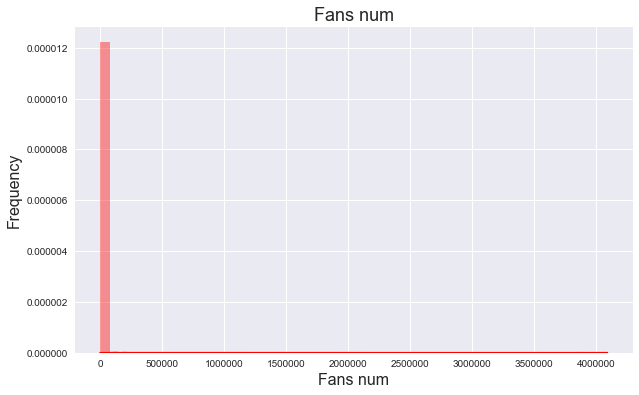

In [16]:
plt.figure(figsize=(10,6))
sns.distplot(data['followers_num'], kde=True, color='red', bins=50)
plt.title('Fans num', fontsize=18)
plt.xlabel('Fans num', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.show()

In [17]:
data['followings_num'].describe()

count    19917.000000
mean       196.519456
std        351.228159
min          0.000000
25%          9.000000
50%         93.000000
75%        248.000000
max      20000.000000
Name: followings_num, dtype: float64

/usr/local/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


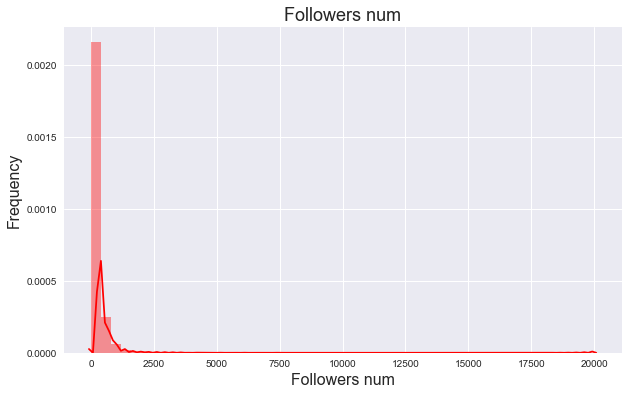

In [18]:
plt.figure(figsize=(10,6))
sns.distplot(data['followings_num'], kde=True, color='red', bins=50)
plt.title('Followers num', fontsize=18)
plt.xlabel('Followers num', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.show()

In [19]:
data['posts_num'].describe()

count     19917.000000
mean       5509.171913
std       12476.503870
min           0.000000
25%          87.000000
50%         932.000000
75%        4806.000000
max      672611.000000
Name: posts_num, dtype: float64

/usr/local/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


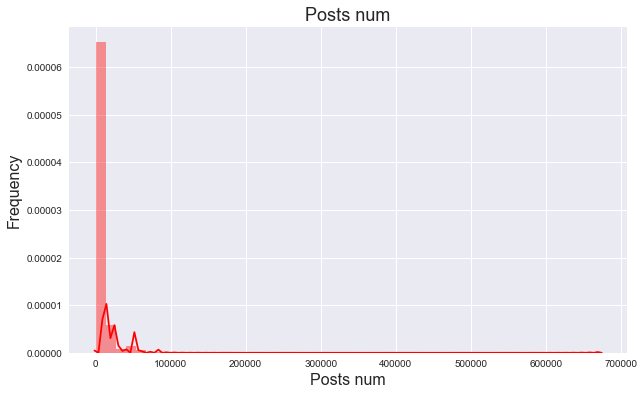

In [20]:
plt.figure(figsize=(10,6))
sns.distplot(data['posts_num'], kde=True, color='red', bins=50)
plt.title('Posts num', fontsize=18)
plt.xlabel('Posts num', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.show()

## upsampling

In [21]:
data['Effective'].value_counts()

1    13362
0     6555
Name: Effective, dtype: int64

In [22]:
from sklearn.utils import resample

In [23]:
data_majority = data[data['Effective']==1]
data_minority = data[data['Effective']==0]

data_minority_upsampled = resample(data_minority, replace=True, n_samples=13362, random_state=1)
data = pd.concat([data_majority, data_minority_upsampled])

data['Effective'].value_counts()

1    13362
0    13362
Name: Effective, dtype: int64

## logistic regression

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [25]:
X = data.drop(labels=['Effective', 'id'], axis=1)
Y = data['Effective'].values

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

In [27]:
lr = LogisticRegression()
lr.fit(X_train, Y_train)

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [28]:
from sklearn import metrics

In [29]:
test_prediction = lr.predict(X_test)

In [30]:
print(metrics.accuracy_score(Y_test, test_prediction))

0.803921568627451


## ROC curve

In [31]:
from sklearn.metrics import roc_curve, auc

In [32]:
probs = lr.predict_proba(X_test)

In [33]:
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(Y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

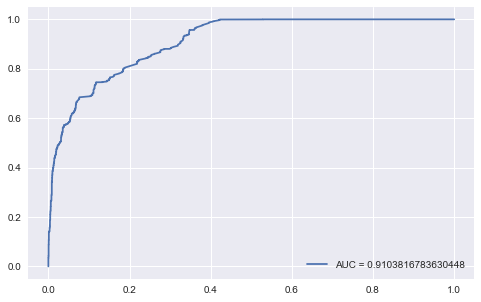

In [34]:
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label="AUC = "+str(roc_auc))
plt.legend(loc=4)
plt.show()

## feature importance

In [35]:
weights = pd.Series(lr.coef_[0], index=X.columns.values)
weights.sort_values(ascending = False)

intro_cat           1.236740
vip_cat             0.590385
default_name_cat    0.187284
gender              0.112772
verified_cat        0.040661
ch_name_cat         0.037525
followings_num      0.002106
followers_num       0.000096
posts_num          -0.000007
vip_num            -0.020819
followers_cat      -0.365520
en_name_cat        -0.476517
garbled_name_cat   -0.584100
default_cont_cat   -1.239710
device_cat         -2.580411
dtype: float64

In [36]:
plt.figure(figsize=(10,6))
weights.nlargest(10).plot(kind='barh').invert_yaxis()

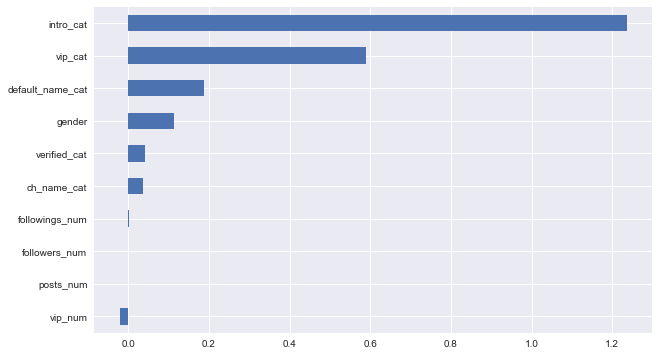

In [37]:
plt.show()

## cross validation

In [38]:
from sklearn.model_selection import KFold,cross_val_score

In [39]:
k_fold = KFold(n_splits=10)

In [40]:
lr_model = LogisticRegression()

In [41]:
kf_scores = np.array([])

In [42]:
for train, test in k_fold.split(X):
    score = lr_model.fit(X.iloc[train, :], Y[train]).score(X.iloc[test, :], Y[test])
    kf_scores = np.append(kf_scores, score)

In [43]:
kf_scores

array([0.76618032, 0.78451178, 0.7620651 , 0.74223719, 0.75673653,
       0.75748503, 0.75935629, 0.79341317, 0.77208084, 0.78929641])

In [44]:
kf_scores.mean()

0.7683362651800775